## k-meansモデルの比較
## (sklearnライブラリ vs 手動)

---

### 1. クラスタ割当て

データ集合 $X$ とクラスタ数 $K$ が与えられたときの各点 ${x}_i$ に対して最も近い重心のインデックス $c_i$ 

$c_i = arg min_{k \in \{1, \ldots, K\}} \| \mathbf{x}_i - \boldsymbol{\mu}_k \|_2$

$\boldsymbol{\mu}_k$ はクラスタ $k$ の重心

---

### 2. 重心の更新

各クラスタの重心は、クラスタに割り当てられた点の平均ベクトルとして計算される

$\boldsymbol{\mu}_k = \frac{1}{|C_k|} \sum_{\mathbf{x}_i \in C_k} \mathbf{x}_i$

$C_k = \{ \mathbf{x}_i \mid c_i = k \}$ はクラスタ $k$ に属する点の集合

In [2]:
#ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

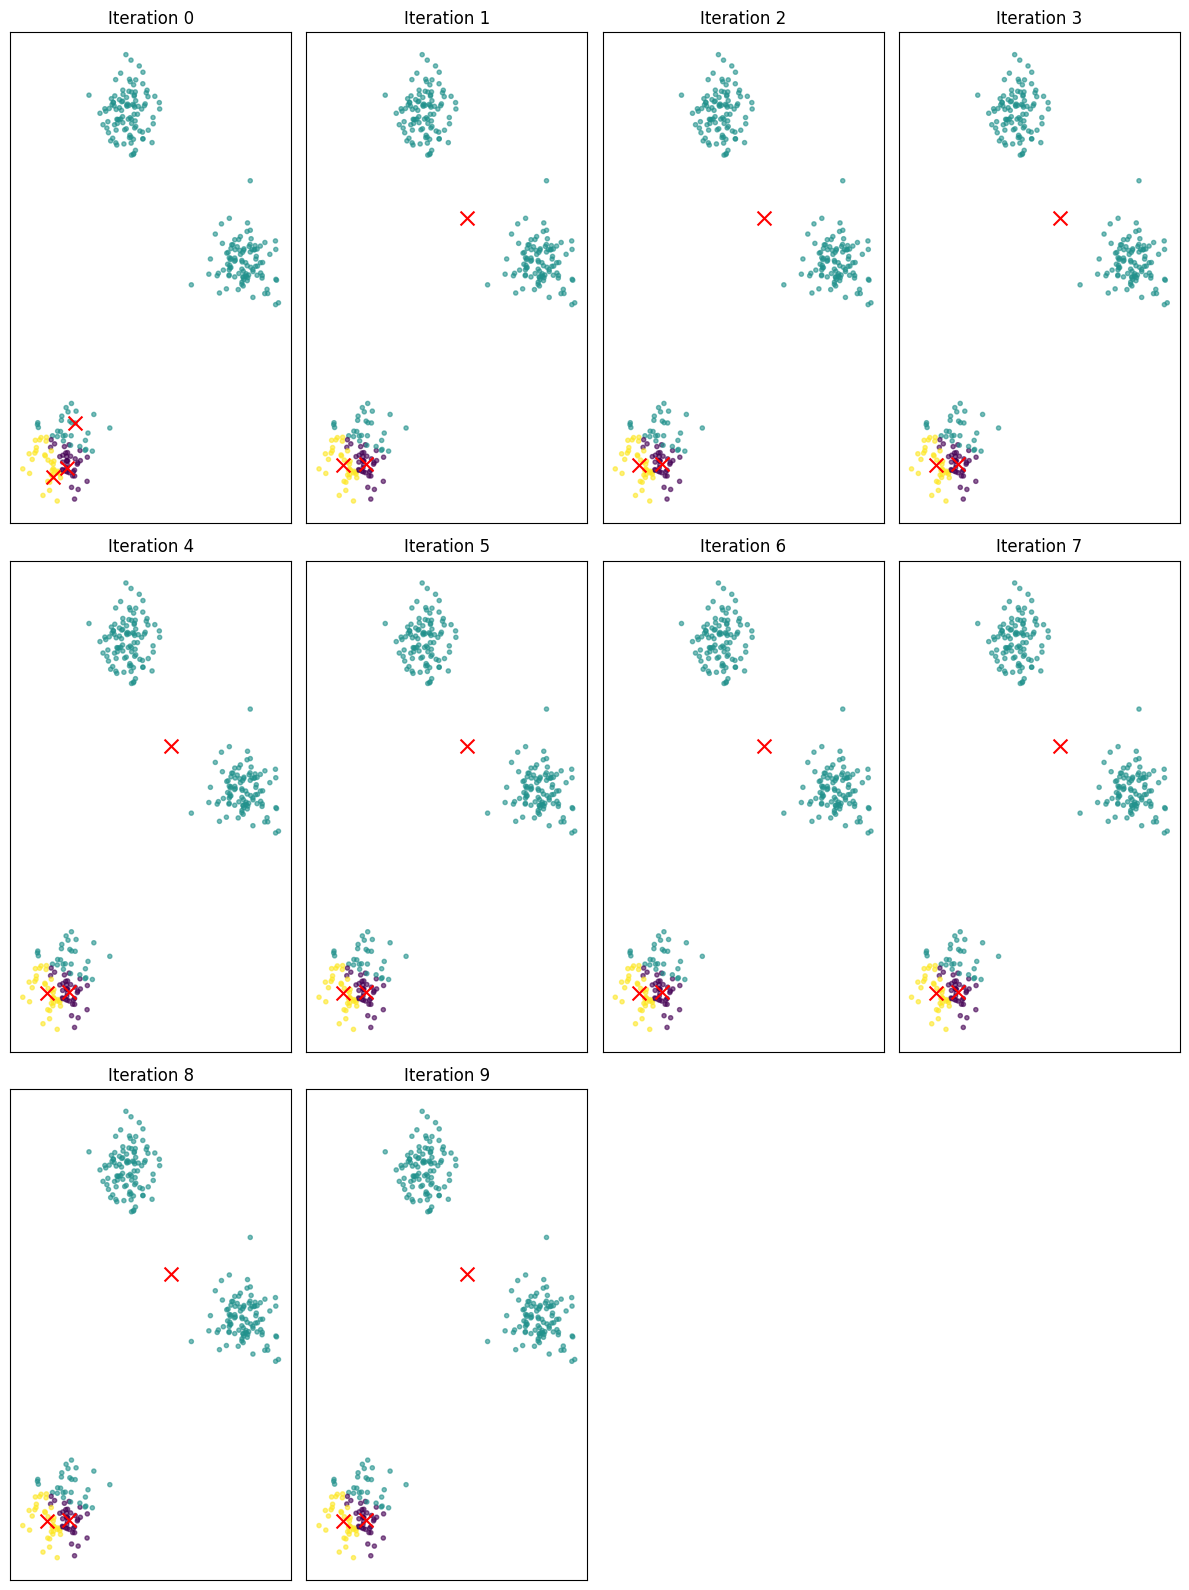

In [ ]:
# 手動によるKMeans実装                                                                  

# 最も近い重心を見つける関数
def find_closest_centroids(X, centroids):
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]): #X[i] = [3.0, 4.0]
        #centroids =[[2.0, 3.0],  [6.0, 7.0]]
        distances = np.linalg.norm(X[i] - centroids, axis=1) #[[1.0, 1.0], [-3.0, -3.0]],distances = [√(1²+1²), √(3²+3²)]
        idx[i] = np.argmin(distances)#[1.414, 7.071]なら0をかえす
    return idx

# 重心の再計算関数
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points = X[idx == k] #X[False, True, True]
        if len(points) > 0:
            centroids[k] = np.mean(points, axis=0)#mean([[4.0, 6.0], [7.0, 8.0]])=[5.5,7.0]
        else:
            centroids[k] = np.zeros(n)  # データが割り当てられていないクラスタの処理[0,　0]
    return centroids

# 複数反復分のプロットを一枚の画像で表示する関数
def plot_progress(X, centroids,idx):
    n_iters = len(centroids)
    fig, axes = plt.subplots(3, 4, figsize=(12, 16))
    axes = axes.flatten() #axes[1][0]がaxes[3]に

    for i in range(n_iters):
        ax = axes[i]
        centroid = centroids[i]
        id = idx[i]

        ax.scatter(X[:, 0], X[:, 1], c=id, cmap='viridis', marker='.', alpha=0.6)
        ax.scatter(centroid[:, 0], centroid[:, 1], c='red', marker='x', s=100)
        ax.set_title(f'Iteration {i}')
        ax.set_xticks([])
        ax.set_yticks([])

    for j in range(n_iters, 12):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# 重心の初期化関数
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0]) #randidx = [3, 0, 4, 1, 2]
    centroids = X[randidx[:K]] #[3, 0]
    return centroids

# K-Meansの実行とプロットをまとめた関数
def kMeans(X, initial_centroids, max_iters=10):
    K = initial_centroids.shape[0]
    centroids = initial_centroids.copy()  
    centroids_list = [centroids.copy()]   
    idx_list = []

    for _ in range(max_iters):
        idx = find_closest_centroids(X, centroids) #[0, 0, 1, 1, 0]
        idx_list.append(idx.copy()) #idx_list.append(idx) とした場合、idx_list に入るのは idx 配列への参照
        new_centroids = compute_centroids(X, idx, K)
        centroids_list.append(new_centroids.copy())#[[[1.1667, 1.4667],[6.5, 8.0]],[[],[]] ]

    #idx_list[0] に対応する重心は centroids_list[0]
    plot_progress(X, centroids_list[:-1], idx_list)

    return centroids, idx_list[-1]




# sklearnでクラスタリング用の2次元データを生成
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# 初期設定
K = 3
initial_centroids = kMeans_init_centroids(X, K)

# K-Meansの実行
centroids, idx = kMeans(X, initial_centroids, max_iters=10)


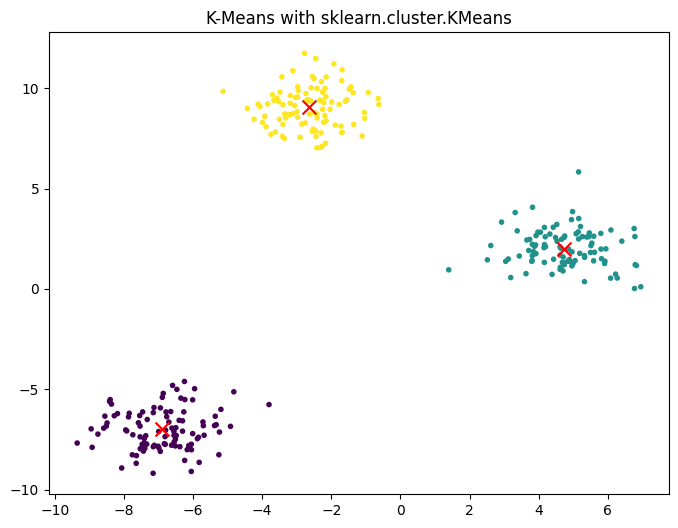

In [ ]:
# sklearnによるKMeans実装
#遠く離れた点を優先的に初期重心として選ぶように内部設定されている
kmeans = KMeans(n_clusters=K, max_iter=10, random_state=42)
kmeans.fit(X)

# 結果取得
centroids = kmeans.cluster_centers_
idx = kmeans.labels_

# 結果の可視化
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=idx, marker='.')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.title('K-Means with sklearn')
plt.show()
